## Imports

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters

## Load image

In [2]:
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/img/'
file_name = 'fantasy.jpg'
file_path = file_directory + file_name

In [3]:
print(file_path)

/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/img/fantasy.jpg


In [79]:
def plot_img(img, show = True):
    
    fig = plt.figure(figsize = (12,12))
    plt.imshow(img, cmap = 'gray', interpolation = 'none')
    
    if show:
        plt.show()

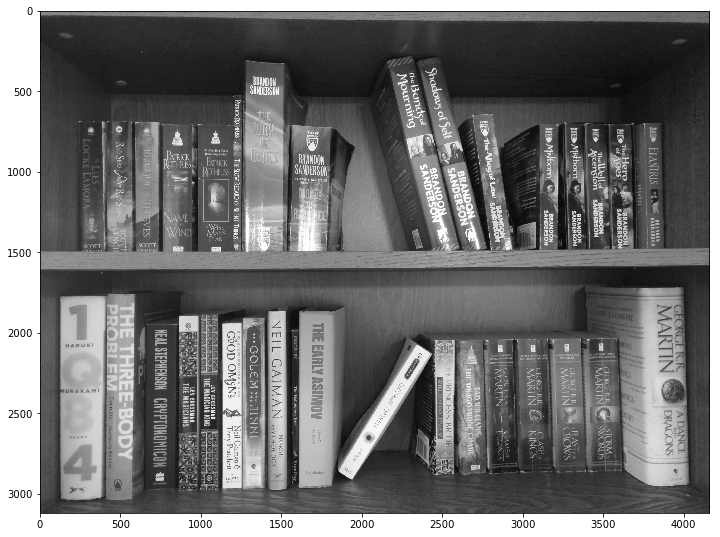

In [5]:
img = cv2.imread(file_path)
img = np.mean(img[:,:], axis = 2).astype(np.uint8)



plot_img(img)

## Process

In [11]:
def auto_canny(img, low_sigma = 0.33, high_sigma = .33):
    
    
    median = np.median(img)
    
    min_val = int(max(0, (1.0 - low_sigma) * median))
    max_val = int(min(255, (1.0 + high_sigma) * median))
    
    print(min_val, max_val)
    
    proc_img = cv2.Canny(img, min_val, max_val)
    
    return proc_img

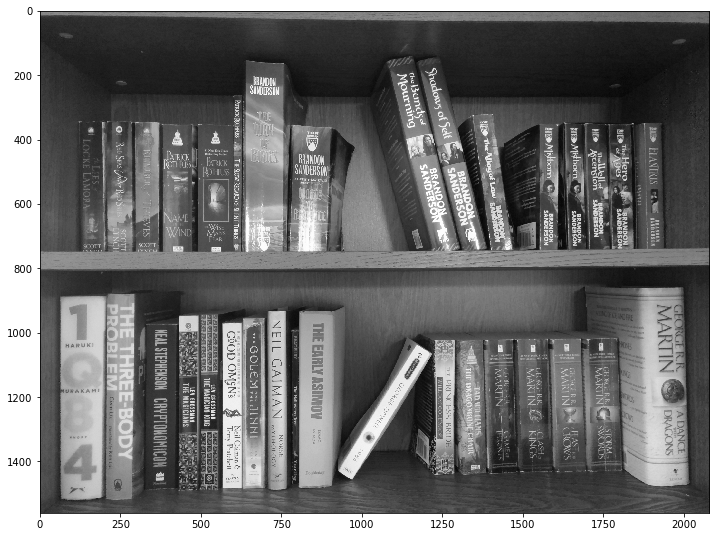

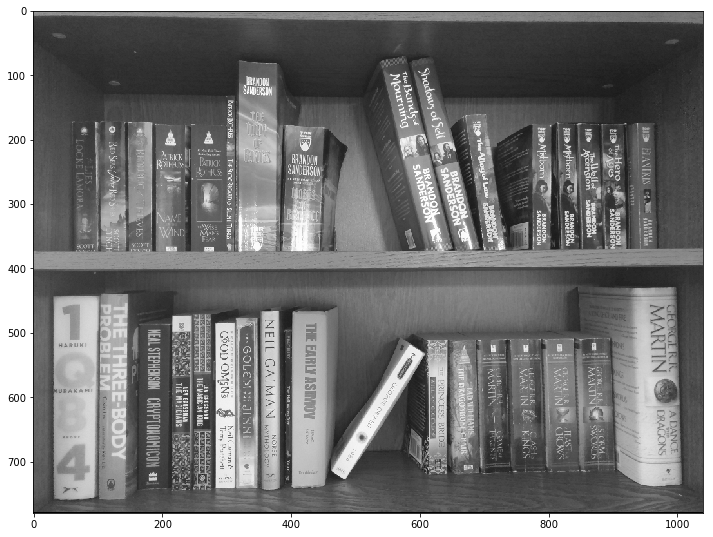

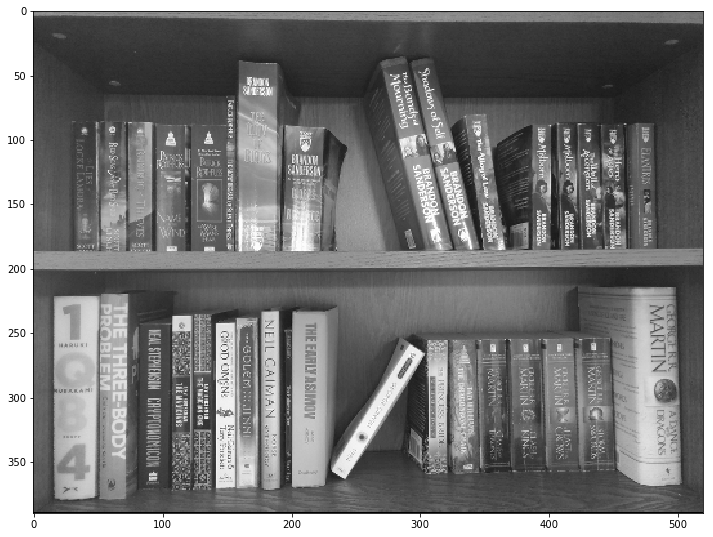

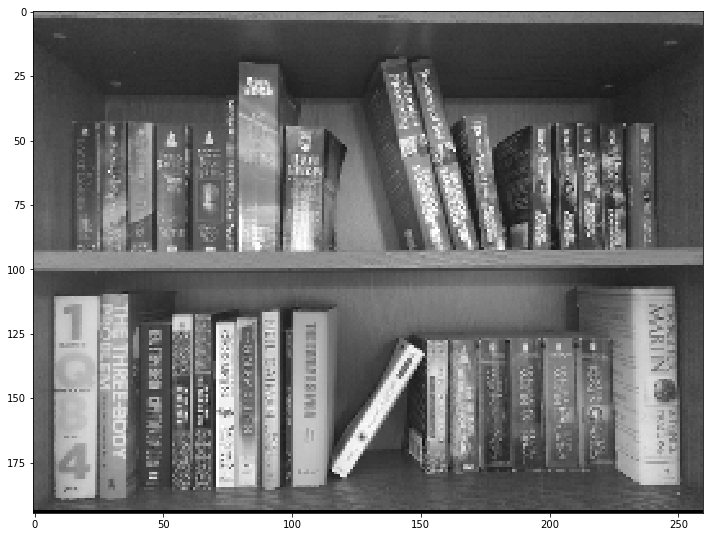

/home/prestonh/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


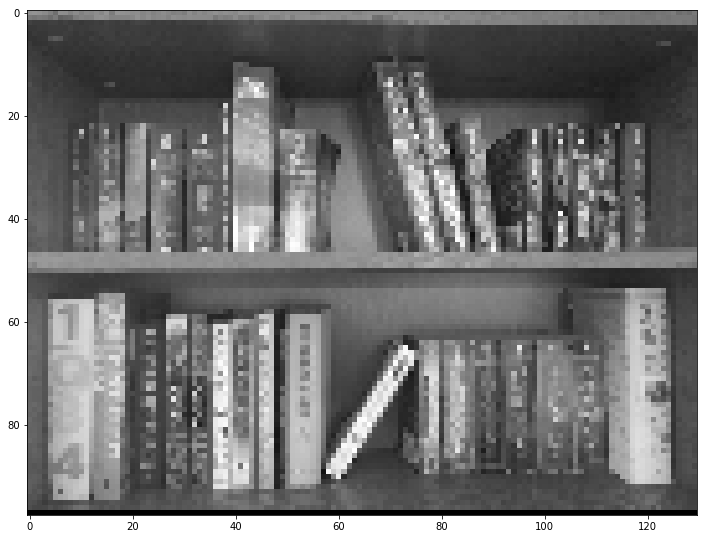

In [12]:
proc_img = np.copy(img)
for i in range(5):
    # Down sample
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    plot_img(proc_img, show = True)
    

otsu


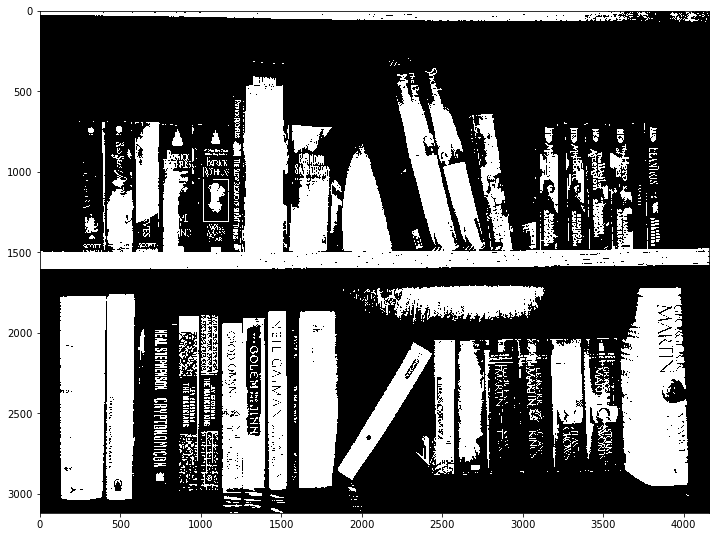

closing


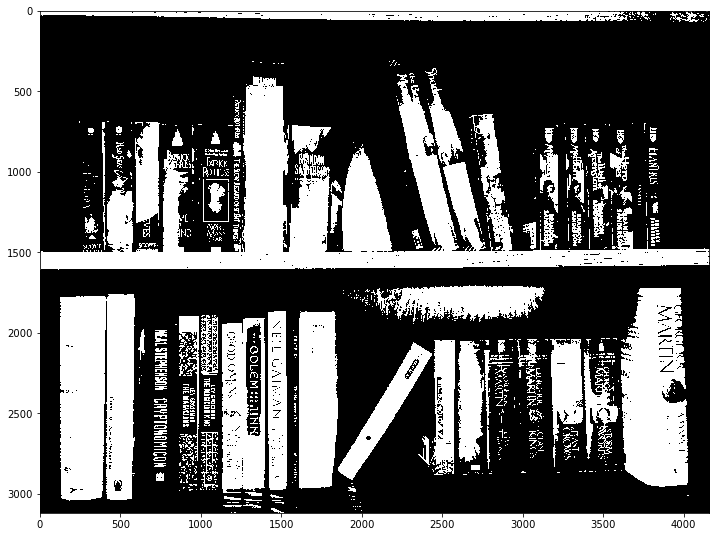

downsample 0


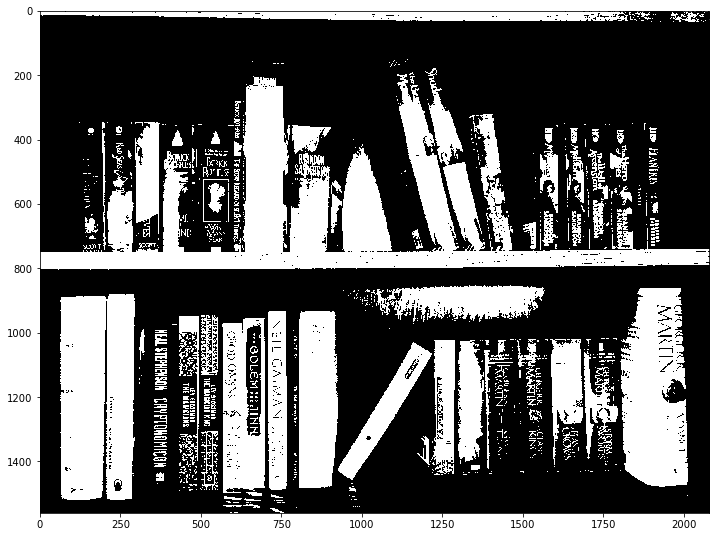

downsample 1


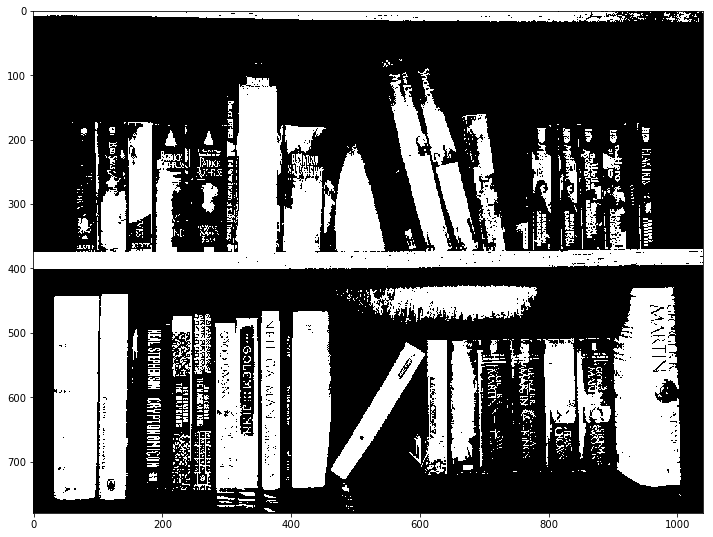

downsample 2


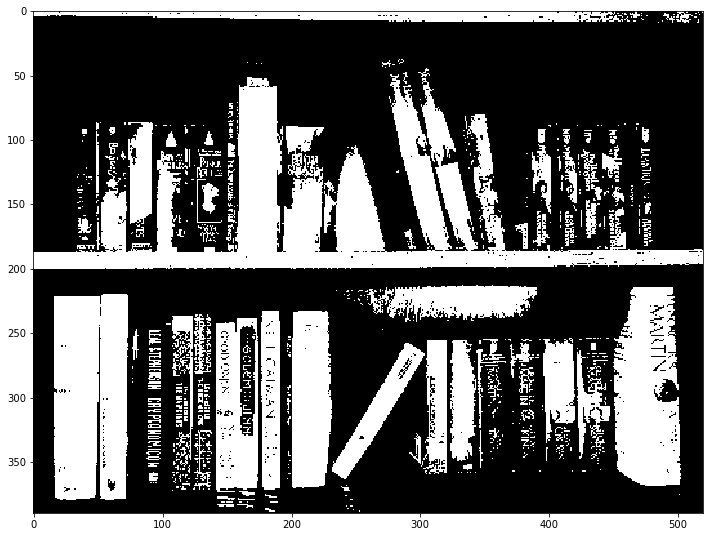

downsample 3


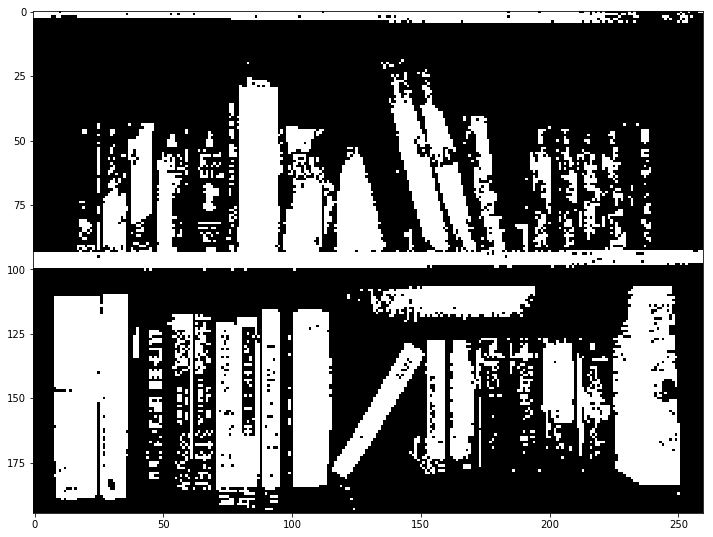

sobel y


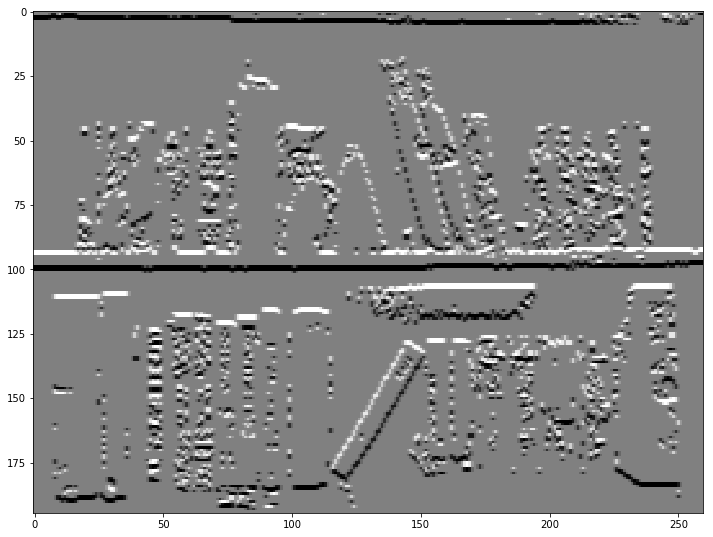

invert


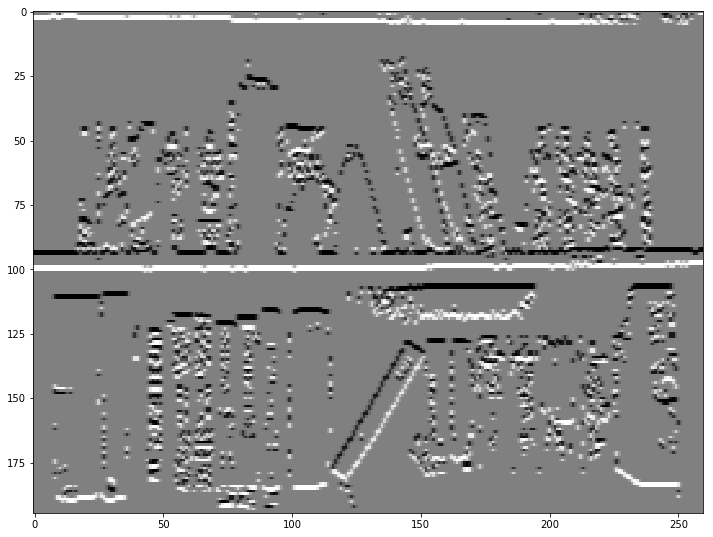

digitize


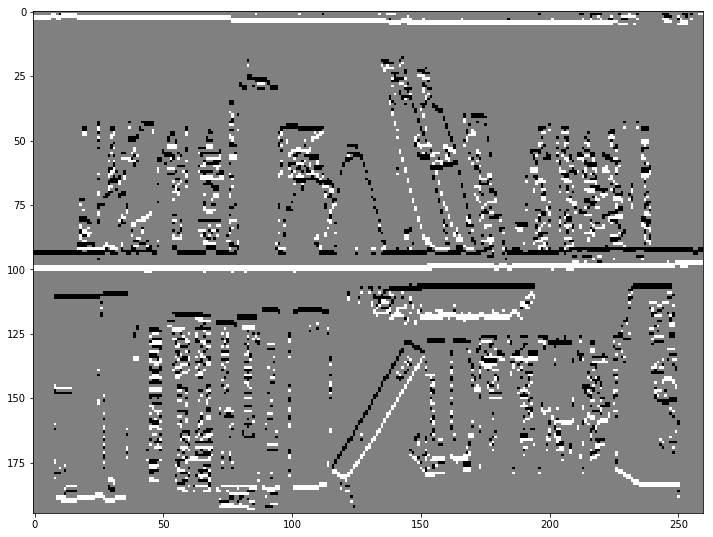

binarize


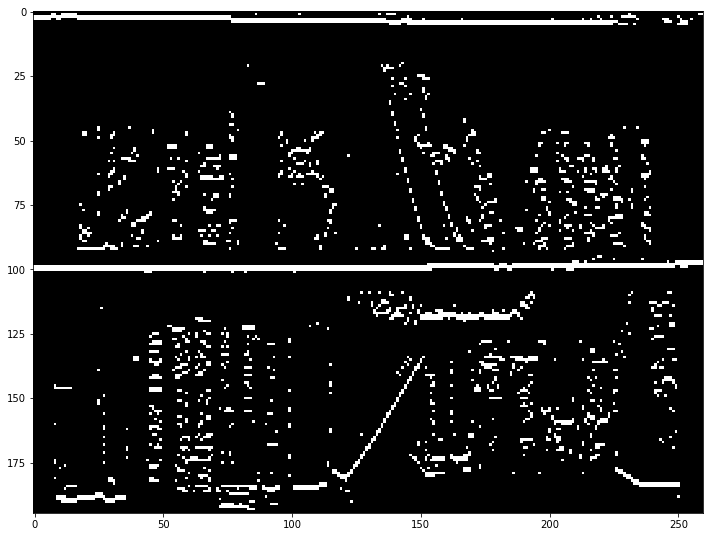

unique values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

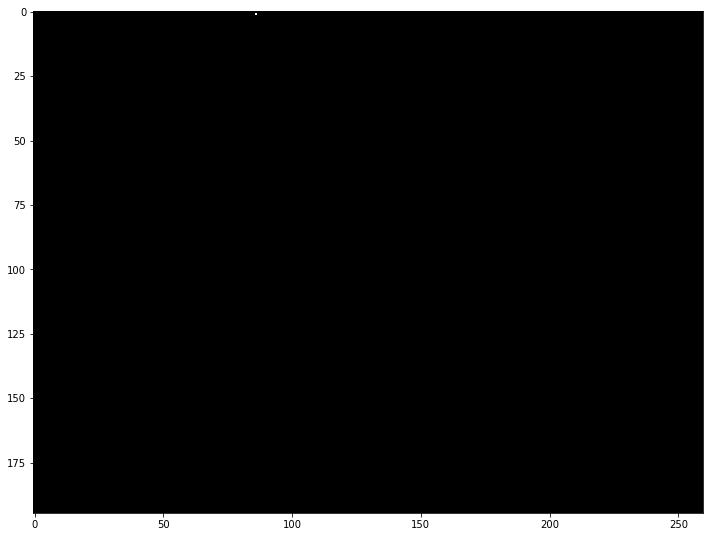

0 0


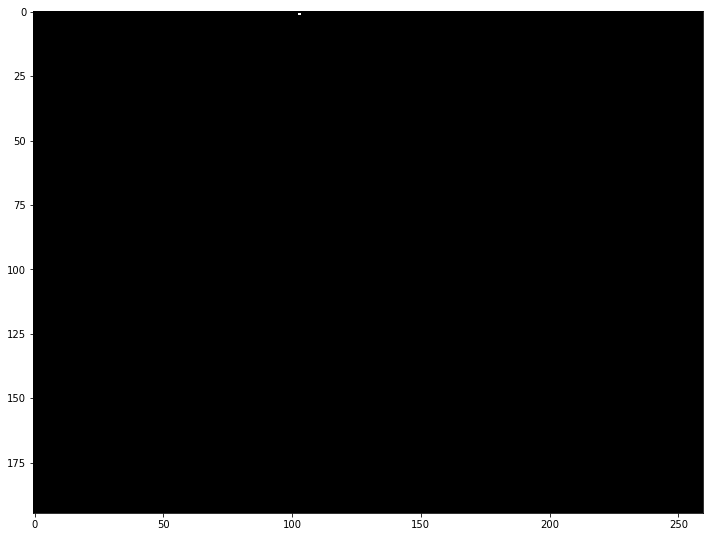

0 0


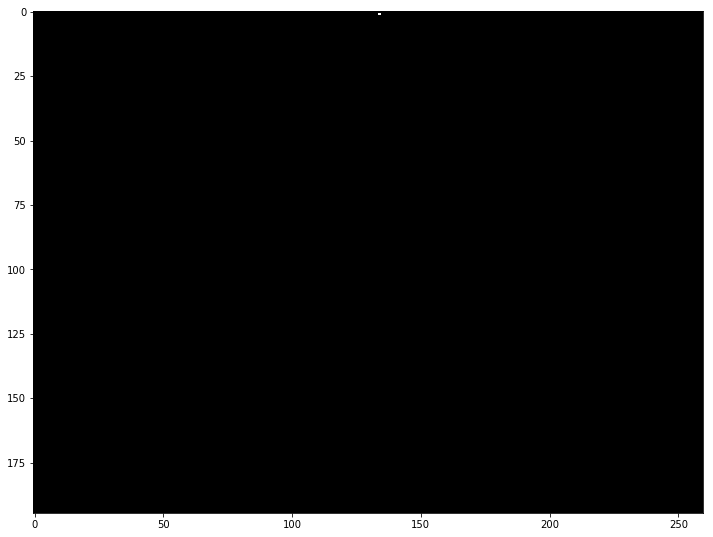

0 3
2 6
0 1
0 0


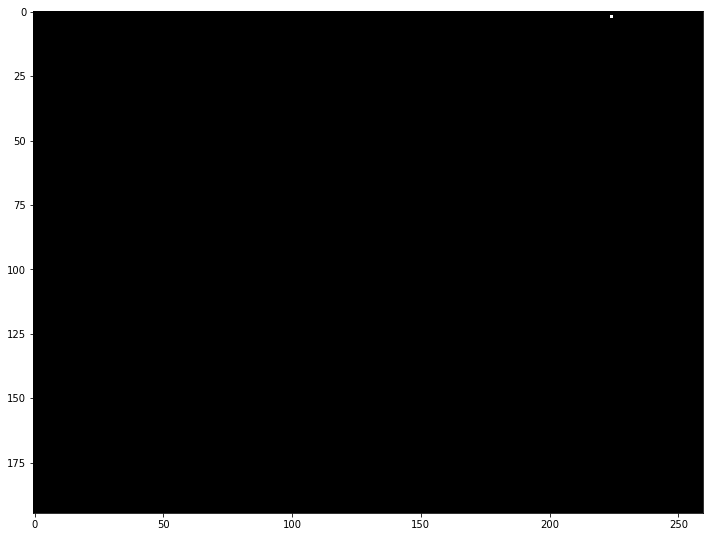

3 3
1 3
0 0


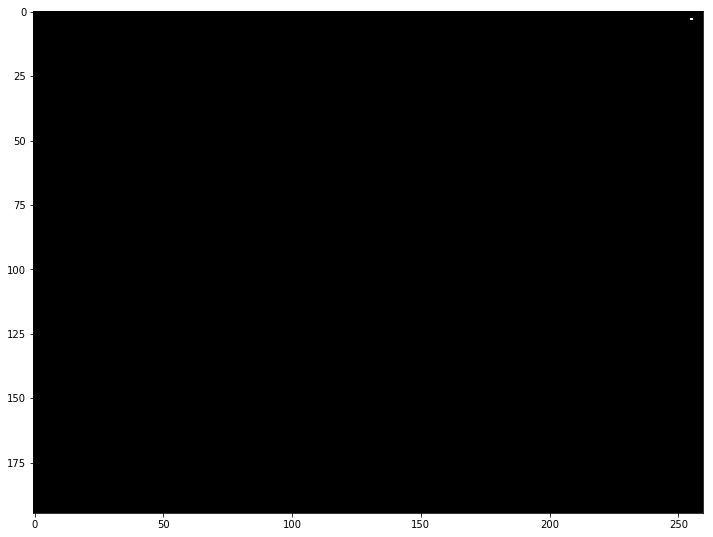

0 0


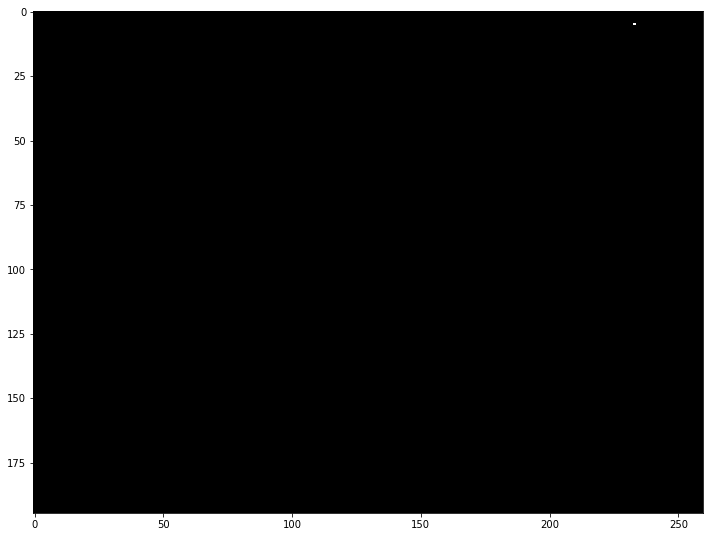

1 1
0 0


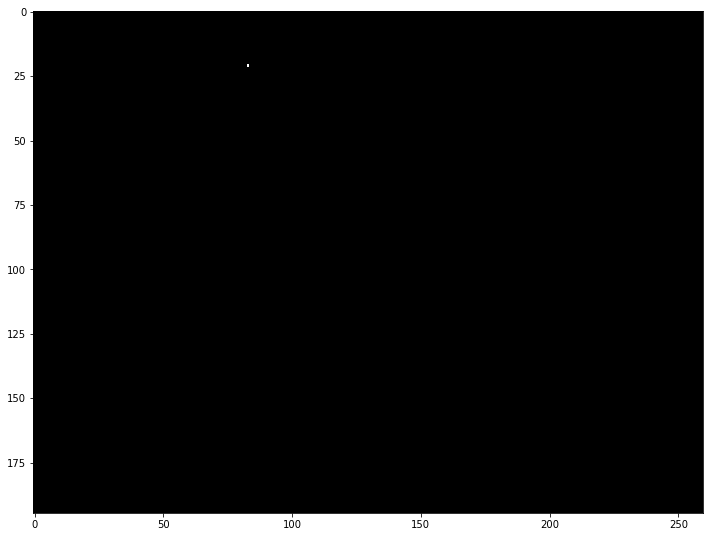

2 4
1 4
0 0


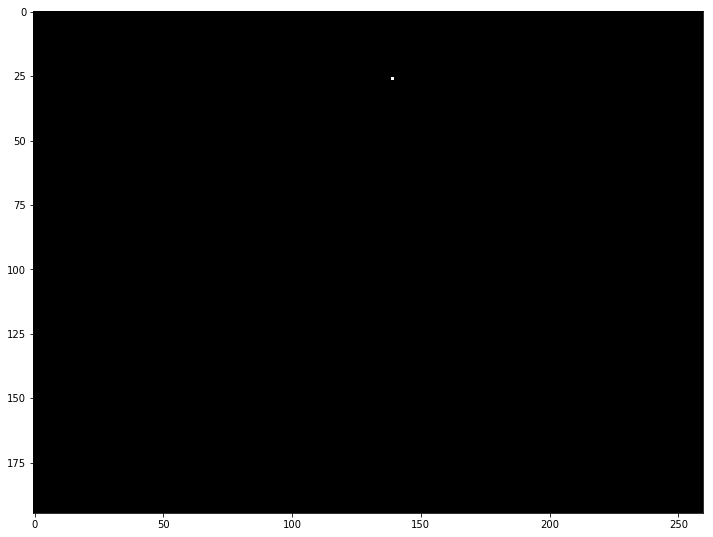

0 0


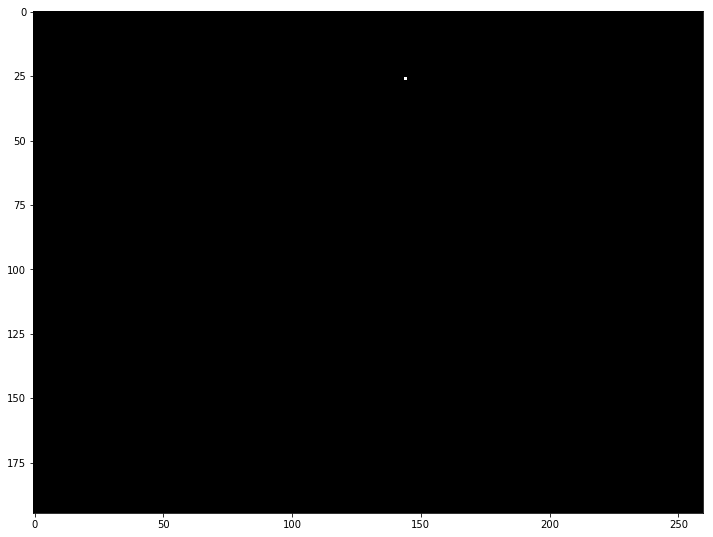

0 2
1 2
0 0


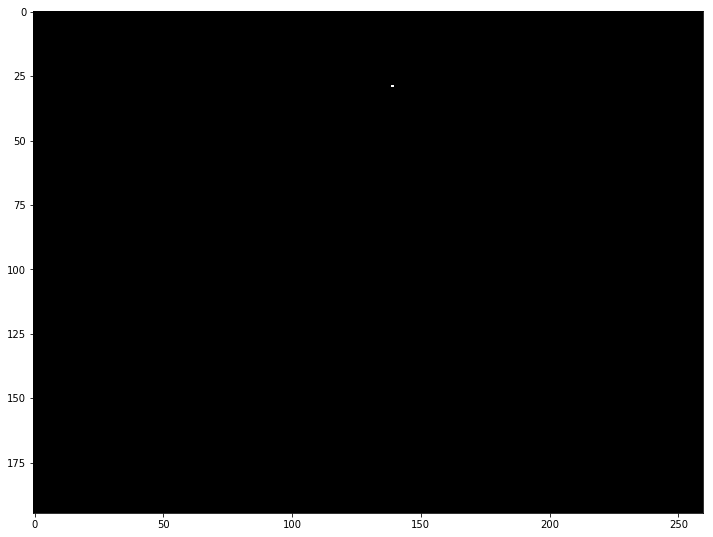

1 0


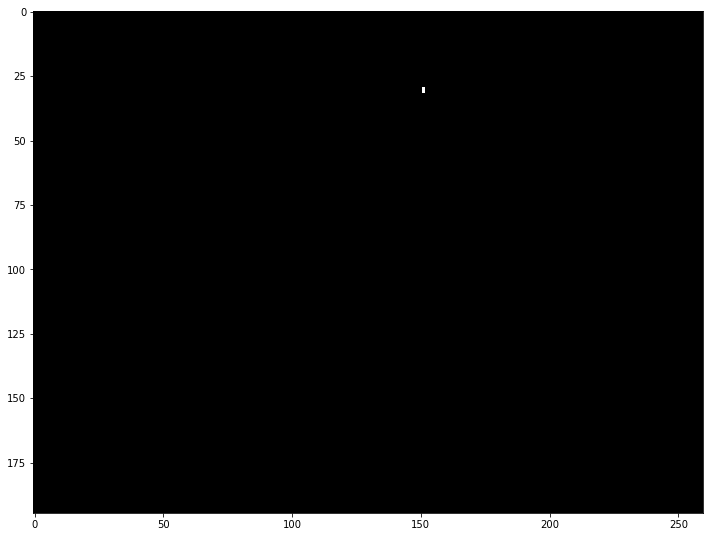

0 0


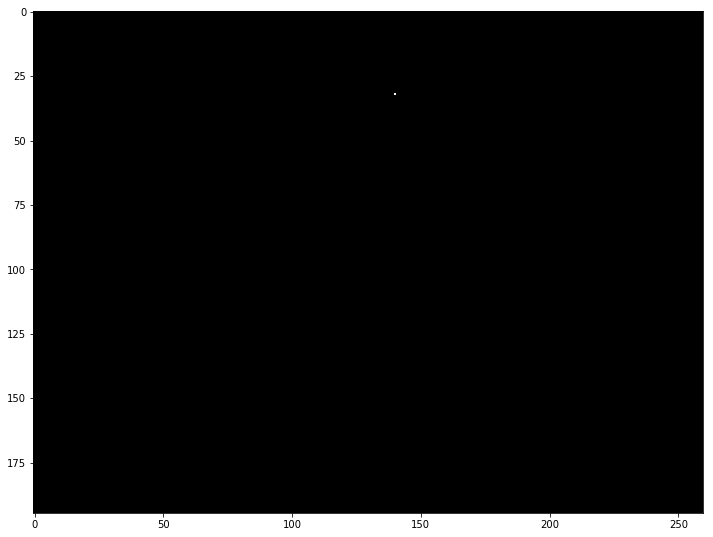

0 0


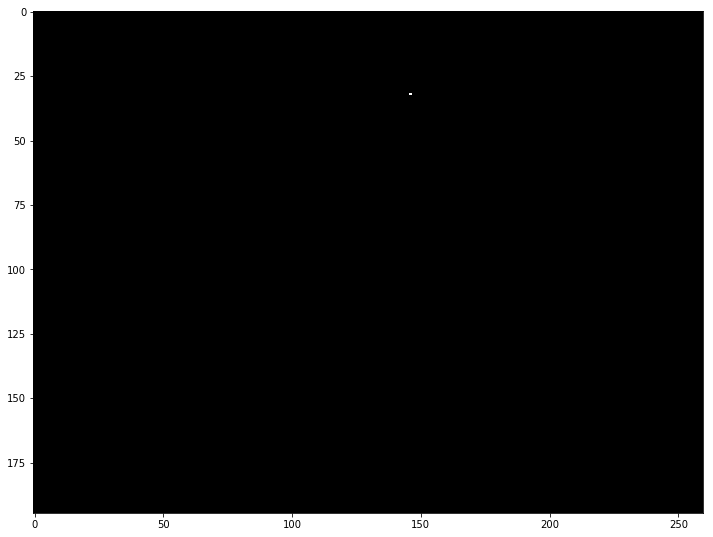

2 1


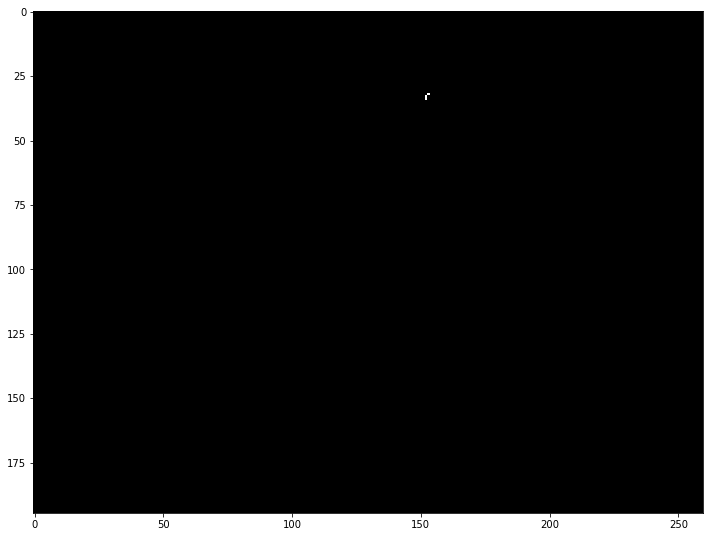

0 0


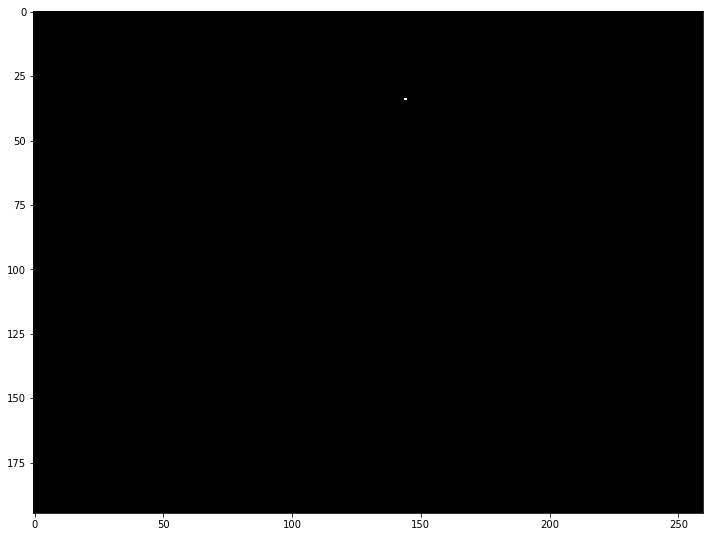

1 0


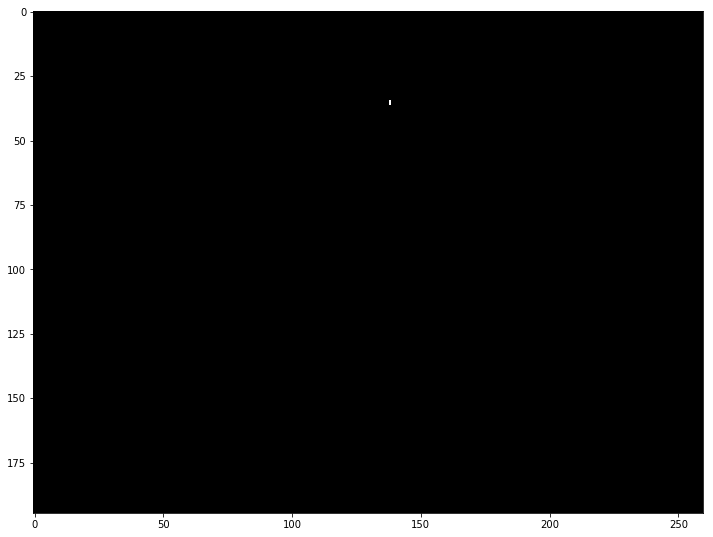

0 0


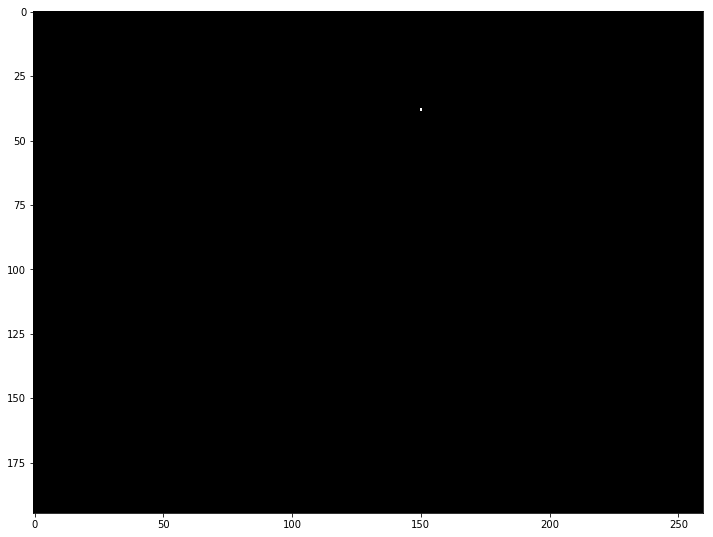

2 1


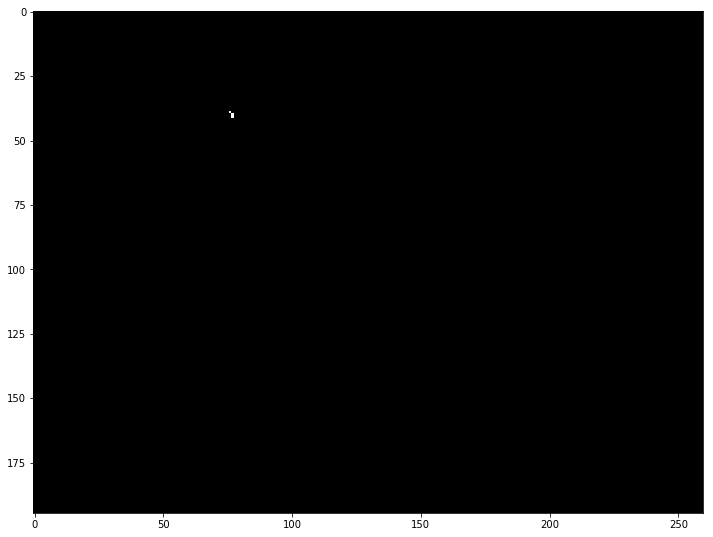

1 0


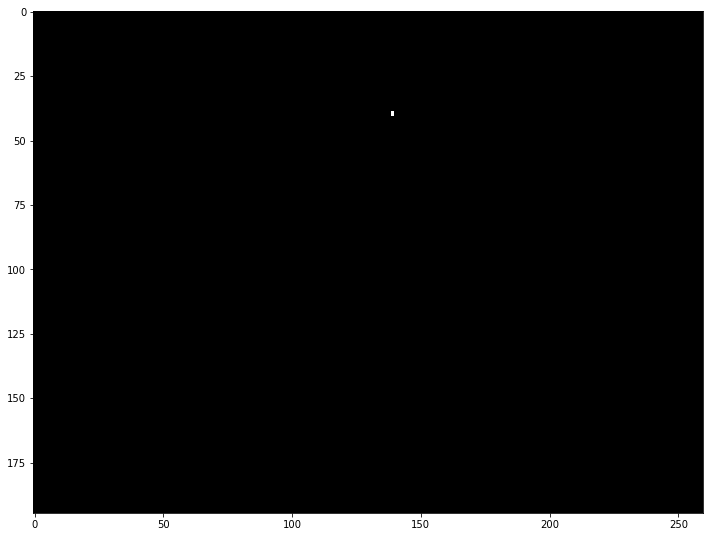

1 0


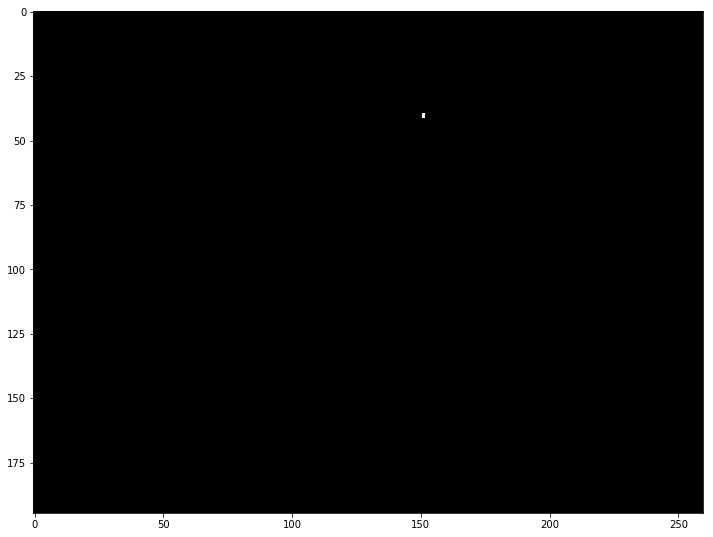

1 0


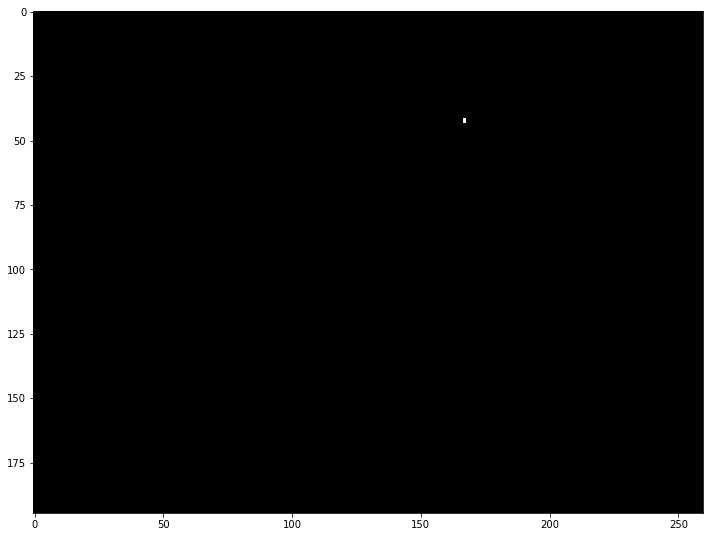

1 0


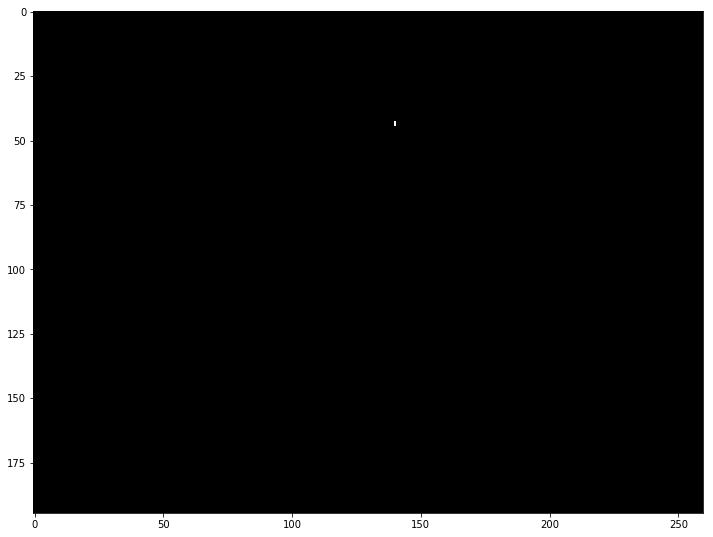

0 1
1 0


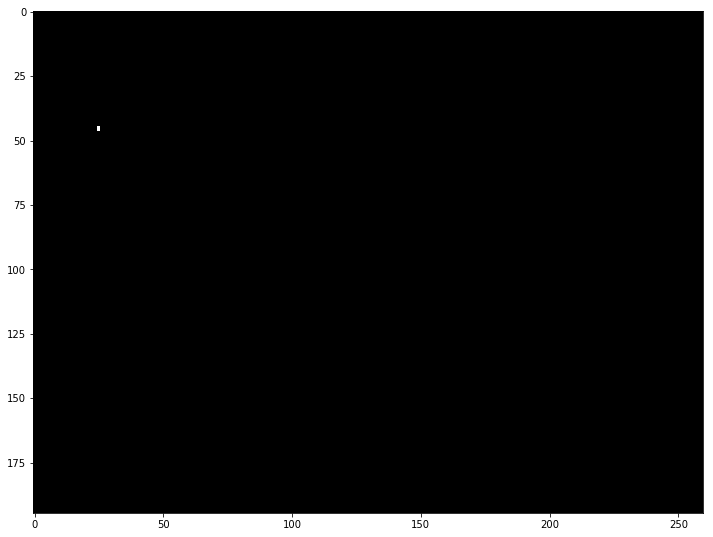

0 0


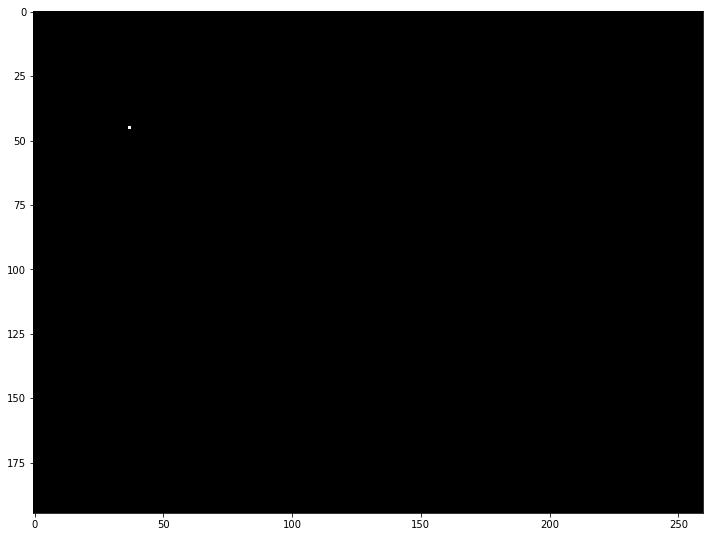

1 0


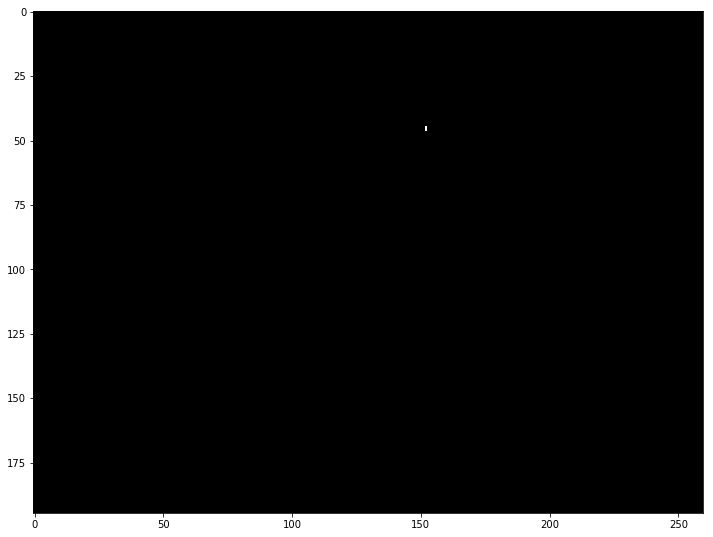

0 0


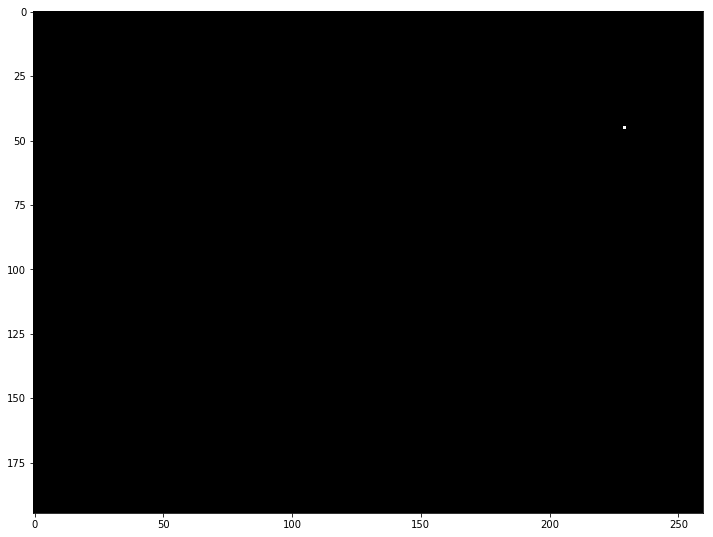

0 0


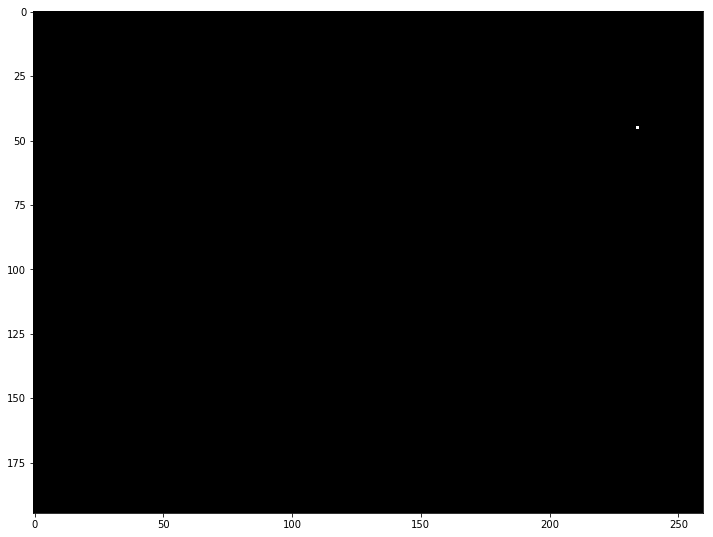

1 0


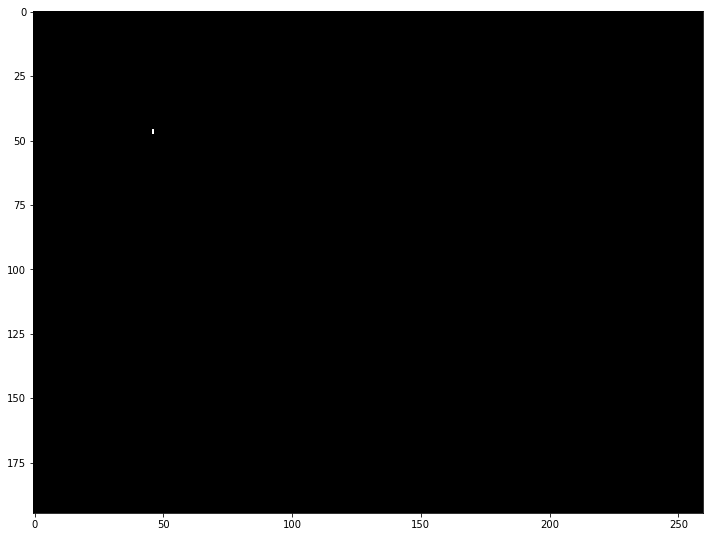

0 0


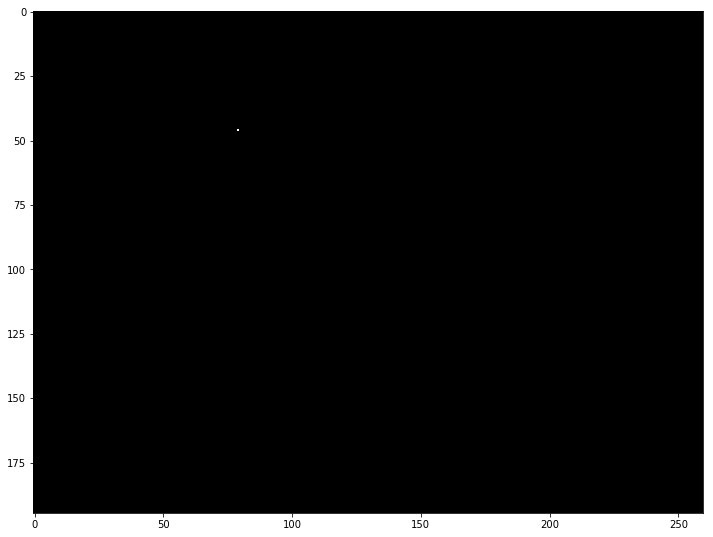

0 0


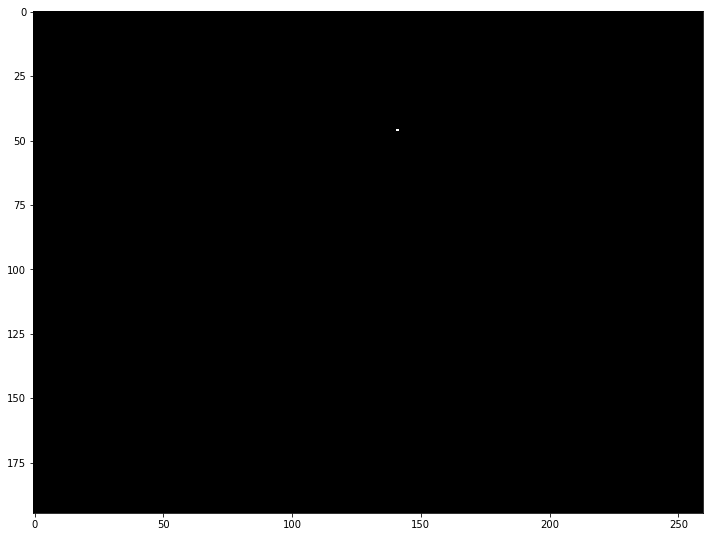

4 3
0 0


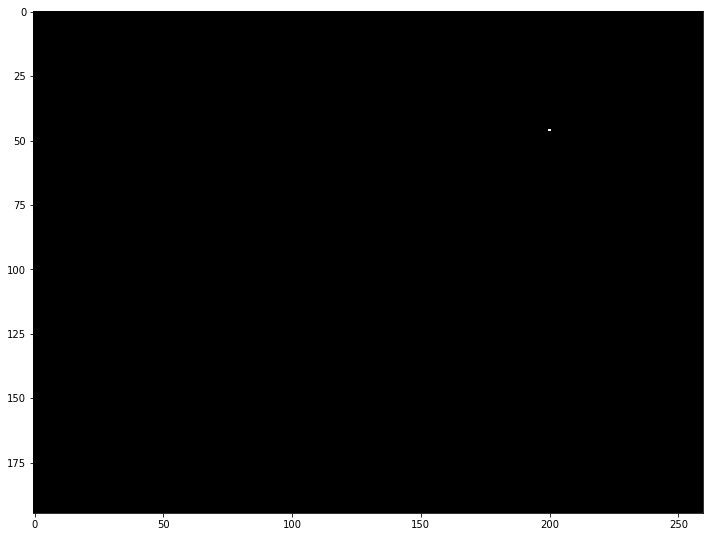

1 1
2 1


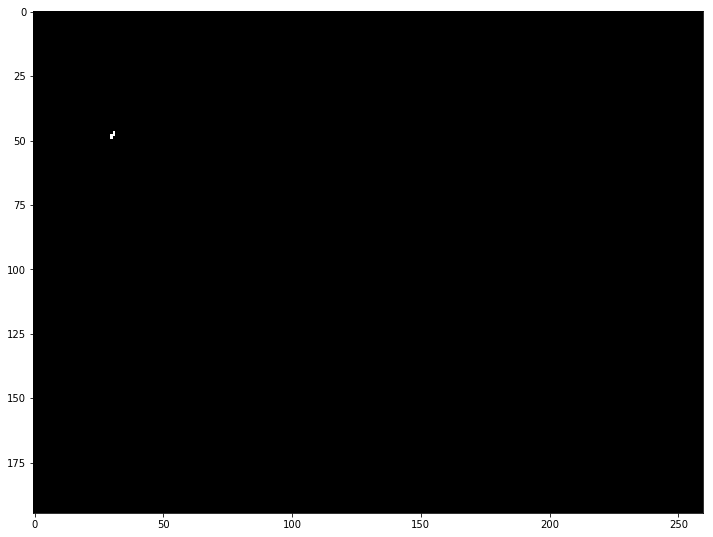

1 0


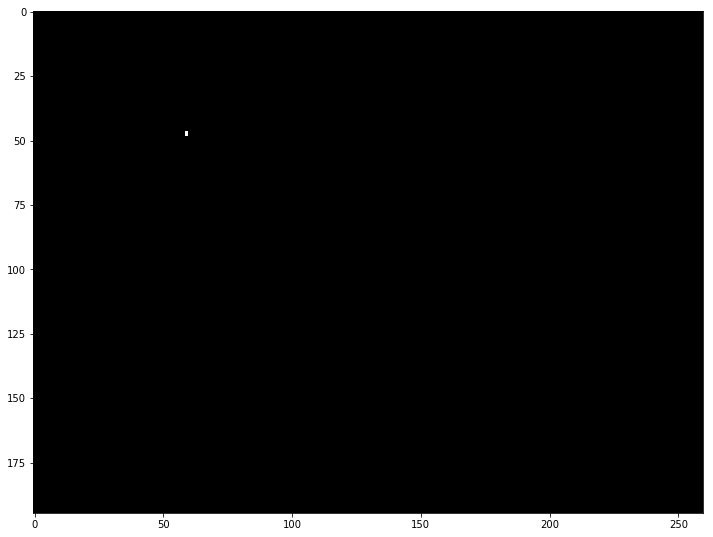

2 1


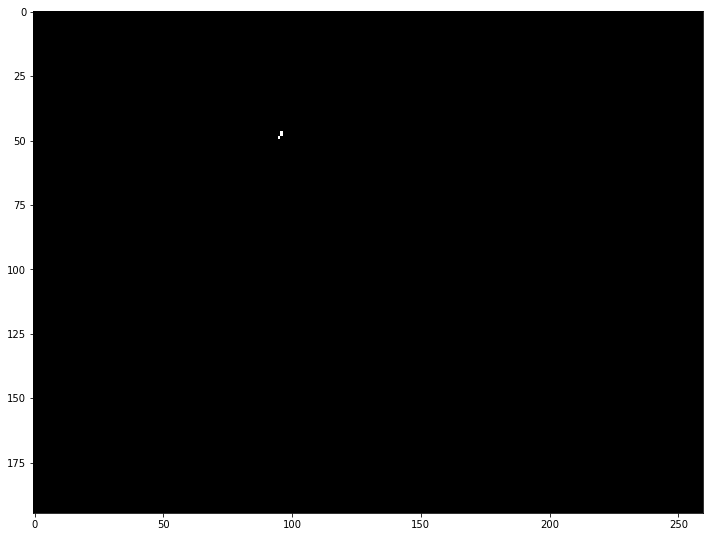

3 4
0 1
0 2
2 1


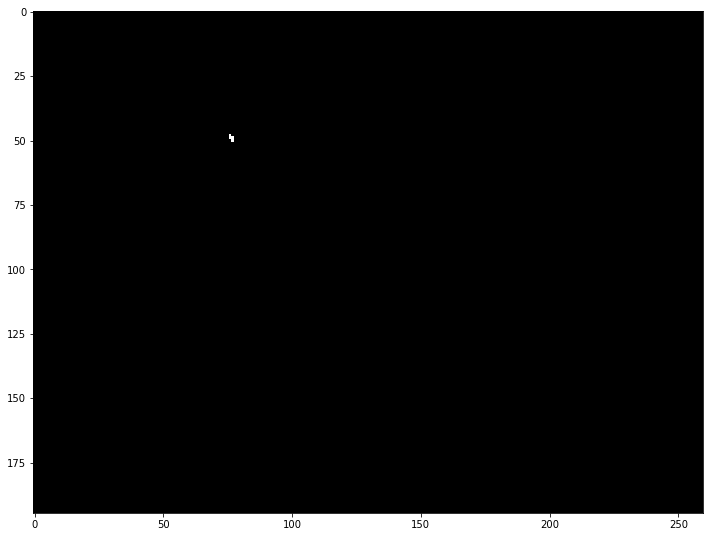

5 6
1 2
0 0


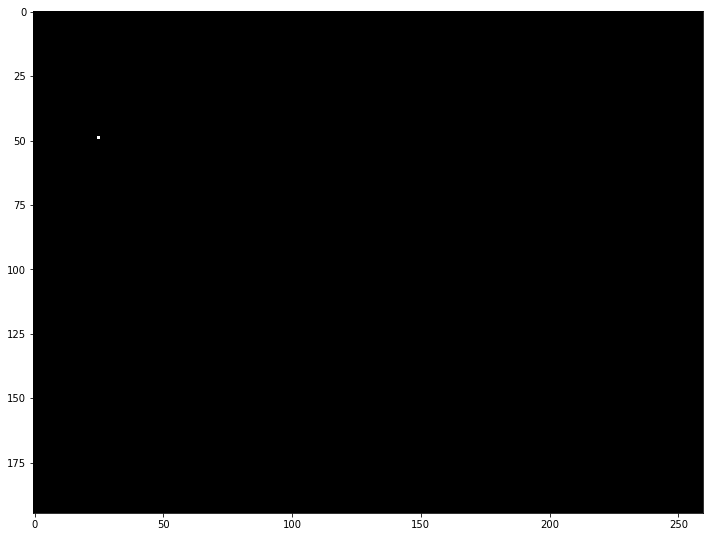

0 0


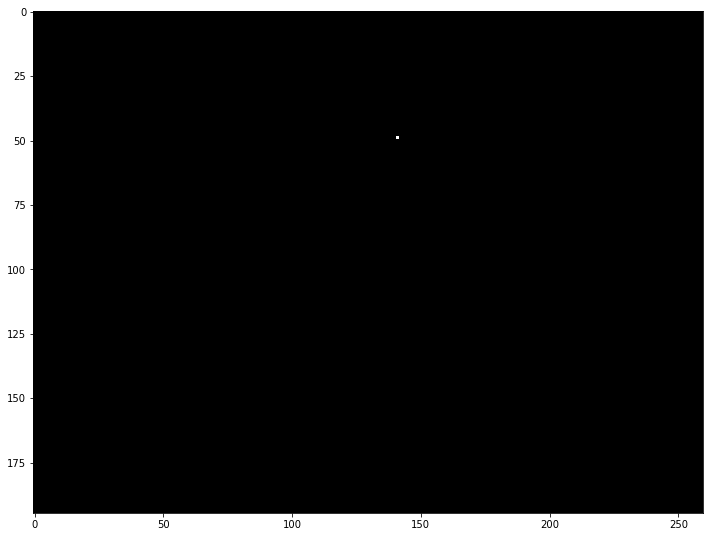

1 0


KeyboardInterrupt: 

In [89]:
debug = True

# Copy
proc_img = np.copy(img)

'''
# Blur
blur_kernel = (3,3)
proc_img = cv2.GaussianBlur(proc_img, blur_kernel, 0)

if debug:
    print('gauss blur', blur_kernel)
    plot_img(proc_img, show = True)
''' 

    
# Otsu
val = skimage.filters.threshold_otsu(img)
otsu_img = img > val
proc_img[otsu_img == 0] = 0
proc_img[otsu_img > 0] = 1

if debug:
    print('otsu')
    plot_img(proc_img, show = True)
    
    
# Erode dilate
kernel = (125,125)
proc_img = cv2.morphologyEx(proc_img, cv2.MORPH_CLOSE, kernel)

if debug:
    print('closing')
    plot_img(proc_img, show = True)





# Down sample
num_downsamples = 4
for i in range(num_downsamples):
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    if debug:
        print('downsample', i)
        plot_img(proc_img, show = True)




# Sobel y
proc_img = cv2.Sobel(proc_img, cv2.CV_64F, 0, 1, ksize = -1)

if debug:
    print('sobel y')
    plot_img(proc_img)

    
    
# Invert
proc_img = np.max(proc_img) - proc_img


if debug:
    print('invert')
    plot_img(proc_img)
    

    
# Digitize
img_max = np.max(proc_img)
img_min = np.min(proc_img)
num_levels = 3
bins = [1.*i*(img_max-img_min)/num_levels for i in range(0, num_levels)]

#bins = [i*1./num_levels for i in range(num_levels+1)]
proc_img = np.digitize(proc_img, bins)

if debug:
    print('digitize')
    plot_img(proc_img, show = True)

    

# Binarize
proc_img[proc_img < np.max(proc_img)] = 0

if debug:
    print('binarize')
    plot_img(proc_img, show = True)


    
# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))

unique_values = list(range(unique_values))

print('unique values', unique_values)


if debug:
    for unique_value in unique_values:
                
        # Get slope and length of each connect component
        bright_pixels = np.where(proc_img == unique_value)
        points = np.hstack((bright_pixels[0].reshape(-1,1), bright_pixels[1].reshape(-1,1)))
        
        dx = np.max(points[:,0]) - np.min(points[:,0])
        dy = np.max(points[:,1]) - np.min(points[:,1])
        
        
        if np.arctan2(dy, dx) < np.pi/6.:
            
            plot_img((proc_img == unique_value))
            
        
        
            


# Look at
plot_img(proc_img, show = False)
plt.savefig('asdf.png', dpi = 300)
plt.show()